## 1-3. 나의 첫 HTTP 통신 코드

- Python의 `requests` 라이브러리를 이용해 HTTP 통신을 진행해봅시다.

### request 라이브러리

- `requests`는 Python을 이용해서 간단히 HTTP 통신을 진행할 수 있는 라이브러리입니다.

이를 사용하기 위해서는 먼저 `requests` 라이브러리를 설치해야합니다.  
`pip install`을 통해서 이를 간단하게 실행할 수 있습니다.

> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드를 실행할 수 있습니다.

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


설치를 다 진행했다면, 이제 requests 모듈을 사용할 준비가 되었습니다.

이제 이를 바탕으로 HTTP 요청을 진행해보러 가볼까요?

* 정보를 request하기 위해서 2가지 방법이 사용되는대 하나는 정보를 달라고 요청하는방식과
* 정보를 갱신해달라고 요청하는 방식 2가지가 존재한다 전자를 GET, 후자를 POST라고 한다.
* 전자이든 후자이든 HTTP에 담아서 요청을 보내곤 한다

### 정보를 달라고 요청하기, GET

In [2]:
# requests 라이브러리를 불러온 후, NAVER의 홈 페이지를 요청한 후 응답 받아보기
# requests안에 있는 get이라는 메소드를 활용해서 쉽게 GET요청을 보낼 수 있다.

import requests

# 정보를 요청하기 위해서는 어디로 하야하는지를 (주소) 적어야한다.

res = requests.get("https://www.naver.com")

res # HTTP응답이 담겨있음.

<Response [200]>

CODE를 실행하면 Response 200이라는 객체를 가져오게 되는대  
여기서 200이라고 써져있는 부분은 status code, 요청에 대한 응답코드이다.  
200은 보통 OK, 잘 수행됫다라는 뜻을 내포하고 있다.  
그리고 이렇게 요청은 객체로 오게 된다. 따라서 요청을 받을 변수를 정의해줘야 한다.

In [3]:
# http 응답의 header를 확인해보자!
# Header를 확인해봅시다 : .headers

res.headers

{'Server': 'NWS', 'Date': 'Mon, 20 Mar 2023 04:51:25 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=5a026da7f0f70f6504c134fd54e34b9e324eca742b4230b072a43c3e84d7e2f9; Expires=Tue, 21 Mar 2023 04:51:25 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}

In [4]:
# Body를 텍스트 형태로 확인해봅시다 : .text

# 200번째 문자까지만 확인해보자

res.text[:200]

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewpo'

여기서 주의해야 할 점은 text라는 메서드는 모든 텍스트를 다 가져온다는 점이다!  
<br>
우리는 특정 태그에 있는 정보만을 원하기 때문이다!  
<br>
이 text를 잘게 분석해주는 parser가 추후에 필요할 것이다!

### 정보 **갱신**하는 것을 요청하기, POST

그렇다면 이렇게 항상 정보를 가져오는 경우만 있습니다.

아닙니다. 우리는 우리의 정보를 제공해주면서 서버로하여금 무언가 요청을 진행할 때도 있습니다.  
우리가 매일 진행하는, **로그인**이 바로 그 예시죠.

이러한 요청을 처리하는 HTTP Method가 있는데, 바로 POST입니다.

POST를 활용하기 위해 다음 사이트를 이용해보도록 하겠습니다:
https://webhook.site


우리는 위 사이트에서 제공하는 이 사이트에 요청을 보내볼것이다  

https://webhook.site/10697be1-5e4a-442d-88c2-e3cfb21805c9  


In [5]:
# payload와 함께 POST를 보내봅시다 : requests.post()
# payload를 requests의 body에 넣어볼것이다!

payload = {"name": "Hello", "age": 13}

res = requests.post("https://webhook.site/10697be1-5e4a-442d-88c2-e3cfb21805c9", payload)



<Response [200]>

응답의 상태 코드를 통해 응답이 잘 왔는지 확인해볼까요?

In [6]:
# 상태 코드(status code)를 확인해봅시다 : .status_code

res.status_code

200

200이 나온다면 정상적으로 요청과 응답이 잘 왔다고 알 수있다!

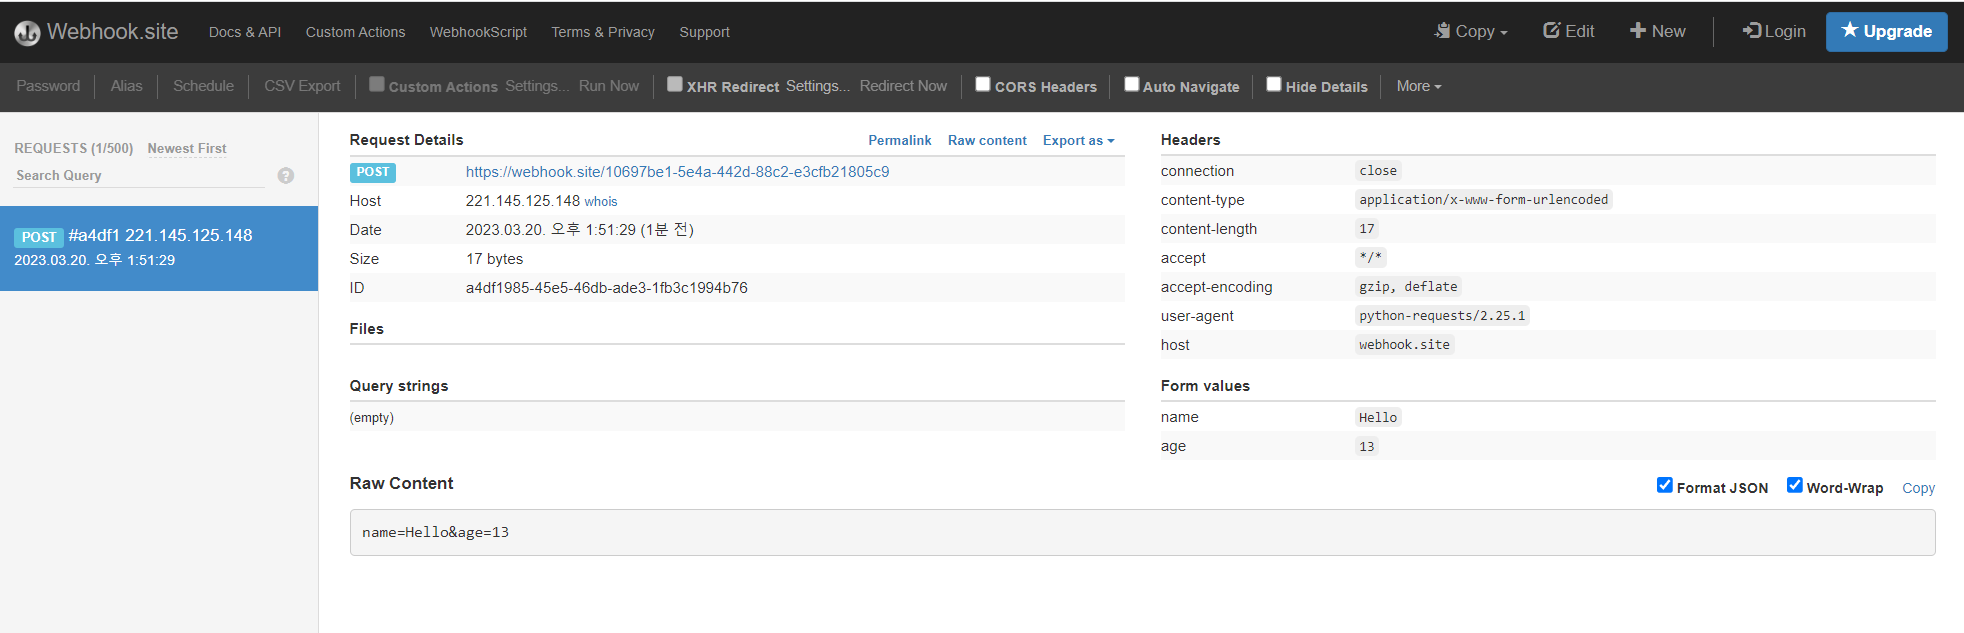